# Statistics and Analysis of Ships and Anime 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import datetime
import ast

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [53]:
# Characters who appear >10 times in the fanfiction, their names gathered into a in a csv file. Converted to pandas DF.
characters = pd.read_csv('myhero_names.csv')

# Archive of Our Own
AO3 = pd.read_csv('AO3.csv')
AO3['published'] = pd.to_datetime(AO3['published'])

# Series overview: Original season number, Number of episodes, First aired, and Last aired.
og_season_anime_airdate = pd.read_csv('og_air_clean.csv')

# Season 1 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Original air date, and English air date.
season_one_anime = pd.read_csv('season_one_clean.csv')

# Season 2-6 Episode number overall, Episode number in the season, Title, Storyboarded by, Directed by,
#     Written by, Viewership rating, Original air date, and English air date.
season_two_anime = pd.read_csv('season_two_clean.csv')
season_three_anime = pd.read_csv('season_three_clean.csv')
season_four_anime = pd.read_csv('season_four_clean.csv')
season_five_anime = pd.read_csv('season_five_clean.csv')
season_six_anime = pd.read_csv('season_six_clean.csv')

# Original Video Animation (OVA) titled "Save! Rescue Training!"
# Number (8 total released), Title, Storyboard by, Directed by, Written by, Original release date.
og_vid_animation_anime =  pd.read_csv('OVAs_clean.csv')

# Japan Home Video Release
# Season, Volume, Epsiodes, Release date.
Japan_homevid_release_anime = pd.read_csv('Japan_HV_clean.csv')

# Funimation/Crunchyroll (North America)
# Season, Volume, Episodes, Release date.
funimation_crunchyroll_anime = pd.read_csv('Fun_Crunch_NA_clean.csv')

# Universal Pictures/Manga Entertainment (UK and Ireland)
# Season, Volume, Episodes, Release date.
universalpictures_manga_anime = pd.read_csv('Up_Uk_clean.csv')

# Universal Sony/Madman Entertainment (Australia and New Zealand)
# Season, Volume, Episodes, Release date Universal, Release date Madman.
universalsony_madman_anime = pd.read_csv('Us_Me_clean.csv')

# Manga
manga = pd.read_csv('mangas_clean.csv')

In [3]:
name_1 = [x for x in characters['1'].values]
name_2 = [x for x in (characters['2'].dropna().values)]
mhanames = name_1 + name_2


In [4]:
season_one_anime

,No.overall,No. inseason,Title,Storyboarded by,Directed by,Written by,Original_Air_Date,English_Air_Date
0,1,1,"""Izuku Midoriya: Origin""Transcription: ""Midori...",Kenji Nagasaki,Takurō Tsukada,Yōsuke Kuroda,2016-04-03,2018-05-05
1,2,2,"""What It Takes to Be a Hero""Transcription: ""Hī...",Kenji Nagasaki,Daisuke Tsukushi,Yōsuke Kuroda,2016-04-10,2018-05-12
2,3,3,"""Roaring Muscles""Transcription: ""Unare kin'nik...",Katsumi Terahigashi,Yoshifumi Sasahara,Yōsuke Kuroda,2016-04-17,2018-05-19
3,4,4,"""Start Line""Transcription: ""Sutaatorain"" (Japa...",Tōru Yoshida,Masato Miyoshi,Yōsuke Kuroda,2016-04-24,2018-06-02
4,5,5,"""What I Can Do For Now""Transcription: ""Ima Bok...",Katsuyuki Kodera,Satoshi Nakagawa,Yōsuke Kuroda,2016-05-01,2018-06-09
5,6,6,"""Rage, You Damned Nerd""Transcription: ""Takere ...",Kō Matsuo,Takurō Tsukada,Yōsuke Kuroda,2016-05-08,2018-06-16
6,7,7,"""Deku vs. Kacchan""Transcription: ""Deku bāsasu ...",Takayuki Tanaka,Geisei Morita,Yōsuke Kuroda,2016-05-15,2018-06-23
7,8,8,"""Bakugo's Start Line""Transcription: ""Sutāto Ra...",Satomi Nakamura,Yoshifumi Sasahara,Yōsuke Kuroda,2016-05-22,2018-06-30
8,9,9,"""Yeah, Just Do Your Best, Ida!""Transcription: ...",Katsuyuki Kodera,Masashi Abe,Yōsuke Kuroda,2016-05-29,2018-07-07
9,10,10,"""Encounter with the Unknown""Transcription: ""Mi...",Shinji Ishihira,Takurō Tsukada,Yōsuke Kuroda,2016-06-05,2018-07-14


In [5]:
dont_want = ['Parents', 'Suffering', 'Loss Of His Will', 'Niece', 'mentioned', 'Family', 'Notebooks', 'Character', 'quirk', 'Friend', 'Eriks', 'Werewolf', 'Prototype', 'Mother', 'Sibling', 'Sidekicks', 'l Jade', 'Nezuko']

In [6]:
AO3['ships'] = AO3['ships'].apply(ast.literal_eval)

In [7]:
Ships = AO3.explode('ships')['ships'].value_counts()

In [8]:
characters['First'] = characters['1']
characters = characters.set_index('First')

In [9]:
def pullship(char1, char2):
    name = []
    name2 = []
    try:
        for i in characters.loc[char1]:
            if type(i) != float:
                name.append(i)
    except:
        name.append(char1)
        
    try:
        for i in characters.loc[char2]:
            if type(i) != float:
                name2.append(i)
    except:
        name2.append(char2)
    
    ship = [name, name2]
    shipname = char1 + ' & ' + char2
    if char1 not in AO3.columns:
        AO3[char1] = 0
    if char2 not in AO3.columns:
        AO3[char2] = 0
    AO3[shipname] = 0
    for index, row in AO3.iterrows():
        for name in ship[0]:
            if name in ''.join(row['ships']):
                for name2 in ship[1]:
                    if name2 in ''.join(row['ships']):
                        if row[shipname] == 0:
                            AO3.loc[index, shipname] = 1
                        if row[char1] == 0 or row[char2] == 0:
                            AO3.loc[index, char1] =+ 1
                            AO3.loc[index, char2] =+ 1

In [10]:
pullship('Deku', 'Katsuki')
pullship('Aizawa', 'Yamada Hizashi')
pullship('Aizawa', 'Deku')
pullship('Katsuki', 'Enjiro')
pullship('Deku', 'Todoroki Sho')
pullship('Dabi', 'Keigo')
pullship('Deku', 'Uraraka')
pullship('Deku', 'All Might')
pullship('Deku', 'Class')
pullship('Denki', 'Shinsou Hitoshi')
pullship('Deku', 'Shinsou Hitoshi')
pullship('Katsuki', 'Reader')
pullship('Katsuki', 'Todoroki Sho')
pullship('Deku', 'Yamada Hizashi')
pullship('Mina', 'Eijirou')
pullship('Jirou Kyouka', 'Denki')
pullship('Deku', 'Shigaraki Tomura')
pullship('Aizawa', 'Shinsou Hitoshi')
pullship('Deku', 'Nedzu')
pullship('Deku', 'Reader')

In [11]:
AO3 = AO3.rename(columns = {'Aizawa & Shinsou Hitoshi': 'Aizawa & Shinsou', 'Shinsou Hitoshi': 'Shinsou',
                            'Jirou Kyouka & Denki': 'Jirou & Denki','Jirou Kyouka': 'Jirou',
                            'Mina & Eijirou': 'Mina & Kirashima', 'Eijirou': 'Kirashima',
                            'Deku & Yamada Hizashi': 'Deku & Prez Mic', 'Yamada Hizashi': 'Prez Mic',
                            'Katsuki & Todoroki Sho': 'Bakugo & Shoto',
                            'Todoroki Sho': 'Shoto', 'Katsuki & Reader': 'Bakugo & Reader', 
                            'Katsuki': 'Bakugo', 'Deku & Shinsou Hitoshi': 'Deku & Shinsou',
                            'Denki & Shinsou Hitoshi': 'Denki & Shinsou', 'Dabi & Keigo': 'Dabi & Hawks',
                            'Keigo': 'Hawks', 'Deku & Todoroki Sho': 'Deku & Shoto',
                            'Katsuki & Enjiro': 'Bakugo & Kirishima', 'Deku & Katsuki': 'Deku & Bakugo',
                            'Aizawa & Yamada Hizashi': 'Aizawa & Prez Mic'})


In [12]:
AO3

,title,mixed fandom,ships,characters,hits,kudos,published,Deku,Bakugo,Deku & Bakugo,...,Kirashima,Mina & Kirashima,Jirou,Jirou & Denki,Shigaraki Tomura,Deku & Shigaraki Tomura,Aizawa & Shinsou,Nedzu,Deku & Nedzu,Deku & Reader
0,Purple poison flames meet Blue fire,['Fandoms:\n鬼滅の刃 | Demon Slayer: Kimetsu no Ya...,[Dabi | Todoroki Touya & Kochou Shinobu],"['Dabi | Todoroki Touya', 'Kochou Shinobu']",0,NaN,2023-04-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stuck With Babysitter Duty,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,[Dazai Osamu/Nakahara Chuuya (Bungou Stray Dogs)],"['Midoriya Izuku', 'Dazai Osamu (Bungou Stray ...",0,NaN,2023-04-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Power in UA!!!,"['Fandoms:\nChainsaw Man (Anime), 僕のヒーローアカデミア ...","[Bakugou Katsuki/Power, Power & Class 1-A]","['Power (Chainsaw Man)', 'Ashido Mina', 'Iida ...",508,7.0,2023-04-02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Balance and Bondeds,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,[Aizawa Shouta | Eraserhead/Yamada Hizashi | P...,"['Midoriya Izuku', 'Midoriya Inko', 'Bakugou K...",11924,481.0,2023-04-02,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Can't Hold Our Babies,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,[Bakugou Katsuki/Midoriya Izuku/Uraraka Ochako...,"['Bakugou Katsuki', 'Uraraka Ochako', 'Midoriy...",0,NaN,2023-04-02,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Seeing double,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,"[Midoriya Izuku/Usagiyama Rumi | Miruko, Midor...","['Midoriya Izuku', 'Class 1-A (My Hero Academi...",14960,507.0,2023-03-28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,My Idol,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,[Bakugou Katsuki/Midoriya Izuku],"['Bakugou Katsuki', 'Midoriya Izuku']",3348,234.0,2023-03-28,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1997,Woodland Paths,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,"[Midoriya Izuku & Yagi Toshinori | All Might, ...","['Midoriya Izuku', 'Yagi Toshinori | All Might...",4604,244.0,2023-03-28,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1998,Boku No Hero Academia: Ones Way,['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academi...,[],"['Mia Ikati', 'Rue Achlys', 'Ryuuji Takao', 'I...",44,NaN,2023-03-28,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
for col in AO3.columns:
    print(col)
    display(AO3[col].value_counts())

title


Wings                                           3
On Why Izuku did not meet the Iidas pre-UA      2
Bittersweet                                     2
Infatuation                                     2
Fear                                            2
                                               ..
Nine lives (and counting)                       1
Of Dreams and Dragons                           1
Two Peas                                        1
Quantity of Quirks                              1
Up the Anti: My Hero Academia New Generation    1
Name: title, Length: 1974, dtype: int64

mixed fandom


['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia (Anime & Manga)']                                                                                                                                                               1089
['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia']                                                                                                                                                                                611
['Fandoms:\n文豪ストレイドッグス | Bungou Stray Dogs, 僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia (Anime & Manga)']                                                                                                                                  9
['Fandoms:\n僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia, Naruto']                                                                                                                                                                          5
['Fandom

ships


[]                                                                                                                                                                                                                                                                                                                                                                              219
[Bakugou Katsuki/Midoriya Izuku]                                                                                                                                                                                                                                                                                                                                                108
[Dabi | Todoroki Touya/Takami Keigo | Hawks]                                                                                                                                                                                                                    

characters


[]                                                                                                                                                                                                                                                                                                                                                                                         65
['Bakugou Katsuki', 'Midoriya Izuku']                                                                                                                                                                                                                                                                                                                                                      45
['Bakugou Katsuki', 'Kirishima Eijirou']                                                                                                                                                                                                    

hits


0       11
14       9
16       9
10       9
44       8
        ..
3283     1
984      1
8787     1
3216     1
4604     1
Name: hits, Length: 1378, dtype: int64

kudos


1.0       76
2.0       64
3.0       49
7.0       45
6.0       43
          ..
3679.0     1
1541.0     1
334.0      1
1008.0     1
507.0      1
Name: kudos, Length: 547, dtype: int64

published


2023-04-01    470
2023-03-31    391
2023-03-30    334
2023-03-29    316
2023-04-02    264
2023-03-28    223
2023-04-03      2
Name: published, dtype: int64

Deku


0    1047
1     953
Name: Deku, dtype: int64

Bakugo


0    1314
1     686
Name: Bakugo, dtype: int64

Deku & Bakugo


0    1399
1     601
Name: Deku & Bakugo, dtype: int64

Aizawa


0    1565
1     435
Name: Aizawa, dtype: int64

Prez Mic


0    1681
1     319
Name: Prez Mic, dtype: int64

Aizawa & Prez Mic


0    1684
1     316
Name: Aizawa & Prez Mic, dtype: int64

Aizawa & Deku


0    1678
1     322
Name: Aizawa & Deku, dtype: int64

Enjiro


0    2000
Name: Enjiro, dtype: int64

Bakugo & Kirishima


0    2000
Name: Bakugo & Kirishima, dtype: int64

Shoto


0    1634
1     366
Name: Shoto, dtype: int64

Deku & Shoto


0    1679
1     321
Name: Deku & Shoto, dtype: int64

Dabi


0    1851
1     149
Name: Dabi, dtype: int64

Hawks


0    1851
1     149
Name: Hawks, dtype: int64

Dabi & Hawks


0    1851
1     149
Name: Dabi & Hawks, dtype: int64

Uraraka


0    1764
1     236
Name: Uraraka, dtype: int64

Deku & Uraraka


0    1764
1     236
Name: Deku & Uraraka, dtype: int64

All Might


0    1850
1     150
Name: All Might, dtype: int64

Deku & All Might


0    1850
1     150
Name: Deku & All Might, dtype: int64

Class


0    1866
1     134
Name: Class, dtype: int64

Deku & Class


0    1866
1     134
Name: Deku & Class, dtype: int64

Denki


0    1829
1     171
Name: Denki, dtype: int64

Shinsou


0    1738
1     262
Name: Shinsou, dtype: int64

Denki & Shinsou


0    1883
1     117
Name: Denki & Shinsou, dtype: int64

Deku & Shinsou


0    1792
1     208
Name: Deku & Shinsou, dtype: int64

Reader


0    1911
1      89
Name: Reader, dtype: int64

Bakugo & Reader


0    1925
1      75
Name: Bakugo & Reader, dtype: int64

Bakugo & Shoto


0    1715
1     285
Name: Bakugo & Shoto, dtype: int64

Deku & Prez Mic


0    1788
1     212
Name: Deku & Prez Mic, dtype: int64

Mina


0    1874
1     126
Name: Mina, dtype: int64

Kirashima


0    1874
1     126
Name: Kirashima, dtype: int64

Mina & Kirashima


0    1874
1     126
Name: Mina & Kirashima, dtype: int64

Jirou


0    1911
1      89
Name: Jirou, dtype: int64

Jirou & Denki


0    1911
1      89
Name: Jirou & Denki, dtype: int64

Shigaraki Tomura


0    1908
1      92
Name: Shigaraki Tomura, dtype: int64

Deku & Shigaraki Tomura


0    1908
1      92
Name: Deku & Shigaraki Tomura, dtype: int64

Aizawa & Shinsou


0    1832
1     168
Name: Aizawa & Shinsou, dtype: int64

Nedzu


0    1953
1      47
Name: Nedzu, dtype: int64

Deku & Nedzu


0    1953
1      47
Name: Deku & Nedzu, dtype: int64

Deku & Reader


0    1953
1      47
Name: Deku & Reader, dtype: int64

<AxesSubplot:>

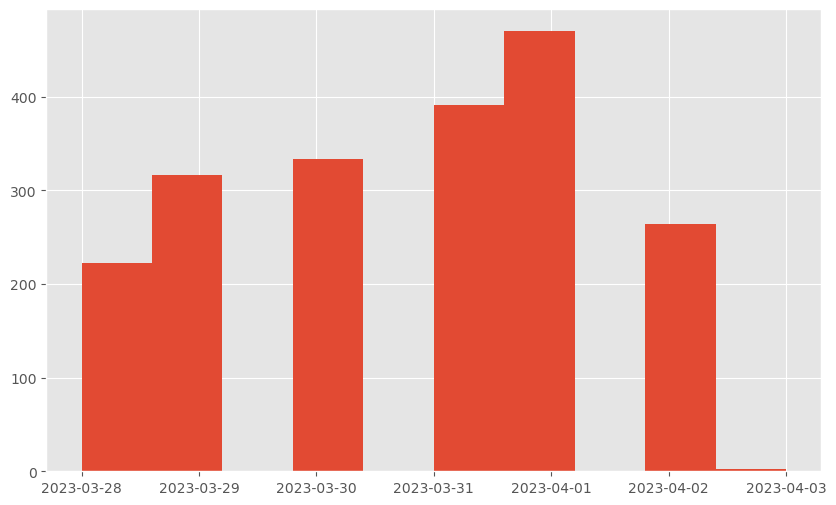

In [14]:
AO3['published'].hist()


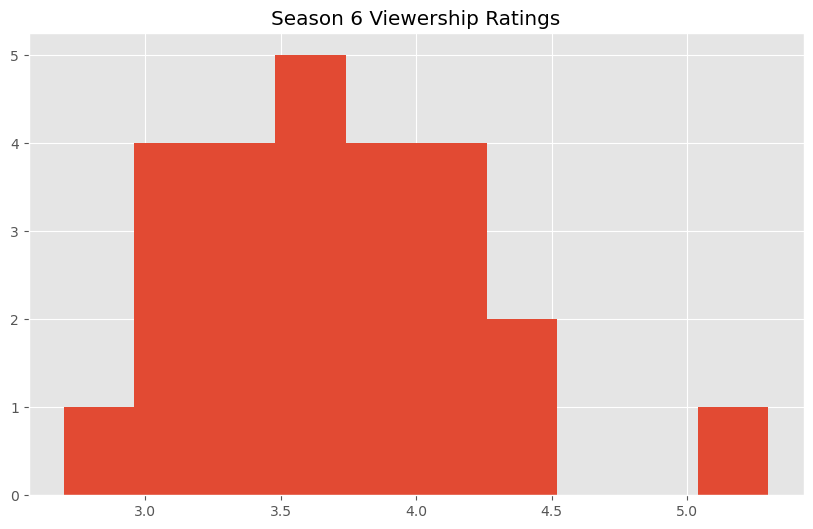

In [15]:
plt.hist(x = 'Viewership rating', data = season_six_anime)
plt.title('Season 6 Viewership Ratings')
plt.show()

In [16]:
season_six_anime['English_Air_Date'] = pd.to_datetime(season_six_anime['English_Air_Date'])

In [17]:
season_six_anime

,No.overall,No. inseason,Title,Storyboarded by,Directed by,Written by,Viewership rating,Original_Air_Date,English_Air_Date
0,114,1,"""A Quiet Beginning""Transcription: ""Shizukana H...",Tomo Ōkubo,Tomo Ōkubo,Yōsuke Kuroda,3.9,2022-10-01,2022-12-04
1,115,2,"""Mirko, the No. 5 Hero""Transcription: ""Nanbā F...",Shōji Ikeno,Shōji Ikeno,Yōsuke Kuroda,3.1,2022-10-08,2022-12-11
2,116,3,"""One's Justice""",Takashi Kawabata,Tsuyoshi Tobita,Yōsuke Kuroda,4.0,2022-10-15,2022-12-18
3,117,4,"""Inheritance""Transcription: ""Keishō"" (Japanese...",Motonobu Hori,Kazuma Komatsu,Yōsuke Kuroda,4.0,2022-10-22,2023-01-08
4,118,5,"""The Thrill of Destruction""Transcription: ""Ham...",Michio Fukuda,Ikurō Satō,Yōsuke Kuroda,4.4,2022-10-29,2023-01-15
5,119,6,"""Encounter, Part 2""Transcription: ""Enkauntā 2""...",Tomo Ōkubo,Tomo Ōkubo,Yōsuke Kuroda,3.6,2022-11-05,2023-01-22
6,120,7,"""Disaster Walker""Transcription: ""Dizasutā Wōkā...",Shōji Ikeno,Shōji Ikeno,Yōsuke Kuroda,3.4,2022-11-12,2023-01-29
7,121,8,"""League of Villains vs. U.A. Students""Transcri...",Kō Matsuo,Kazuma Komatsu,Yōsuke Kuroda,3.4,2022-11-19,2023-02-05
8,122,9,"""Katsuki Bakugo: Rising""Transcription: ""Bakugō...",Tomohiro Kamitani,Tomohiro Kamitani,Yōsuke Kuroda,3.7,2022-11-26,2023-02-12
9,123,10,"""The Ones Within Us""Transcription: ""Bokura no ...",Tomo Ōkubo,Tomo Ōkubo,Yōsuke Kuroda,5.3,2022-12-03,2023-02-19


In [18]:
ships_dates = AO3.drop(columns = ['title', 'mixed fandom', 'ships', 'characters'])
ships_dates.describe()
ships_dates['sum hits'] = ships_dates['hits']
ships_dates['sum kudos'] = ships_dates['kudos']

In [20]:
ships_dates_group = ships_dates.groupby(['published']).agg({'hits': 'mean','sum hits': 'sum', 'kudos': 'mean', 'sum kudos': 'sum', 'Deku': 'sum', 'Bakugo': 'sum', 'Deku & Bakugo': 'sum', 'Aizawa': 'sum',
       'Prez Mic': 'sum', 'Aizawa & Prez Mic': 'sum', 'Aizawa & Deku': 'sum', 'Enjiro': 'sum',
       'Bakugo & Kirishima': 'sum', 'Shoto': 'sum', 'Deku & Shoto': 'sum', 'Dabi': 'sum', 'Hawks': 'sum',
       'Dabi & Hawks': 'sum', 'Uraraka': 'sum', 'Deku & Uraraka': 'sum', 'All Might': 'sum',
       'Deku & All Might': 'sum', 'Class': 'sum', 'Deku & Class': 'sum', 'Denki': 'sum', 'Shinsou': 'sum',
       'Denki & Shinsou': 'sum', 'Deku & Shinsou': 'sum', 'Reader': 'sum', 'Bakugo & Reader': 'sum',
       'Bakugo & Shoto': 'sum', 'Deku & Prez Mic': 'sum', 'Mina': 'sum', 'Kirashima': 'sum',
       'Mina & Kirashima': 'sum', 'Jirou': 'sum', 'Jirou & Denki': 'sum', 'Shigaraki Tomura': 'sum',
       'Deku & Shigaraki Tomura': 'sum', 'Aizawa & Shinsou': 'sum', 'Nedzu': 'sum', 'Deku & Nedzu': 'sum',
       'Deku & Reader': 'sum'})

In [21]:
ships_only = ships_dates_group.loc[:,['Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader']]

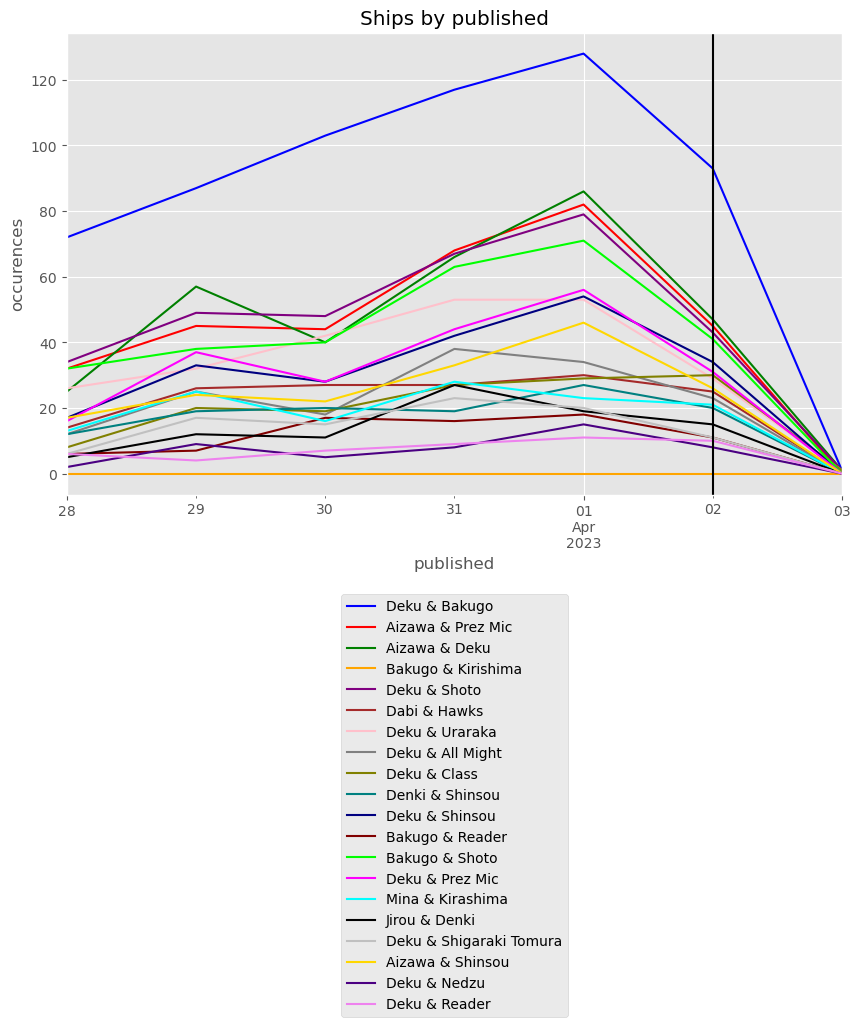

In [40]:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']


ships_only.plot(color = colors)
plt.ylabel('occurences')
plt.title('Ships by published')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'upper center')
plt.axvline(x = season_six_anime['English_Air_Date'][19], color = 'black')
plt.show()

In [48]:
season_six_anime['Original_Air_Date']

0     2022-10-01
1     2022-10-08
2     2022-10-15
3     2022-10-22
4     2022-10-29
5     2022-11-05
6     2022-11-12
7     2022-11-19
8     2022-11-26
9     2022-12-03
10    2022-12-10
11    2022-12-17
12    2022-12-24
13    2023-01-07
14    2023-01-14
15    2023-01-21
16    2023-01-28
17    2023-02-04
18    2023-02-11
19    2023-02-18
20    2023-02-25
21    2023-03-04
22    2023-03-11
23    2023-03-18
24    2023-03-25
Name: Original_Air_Date, dtype: object

In [42]:
char_in_ships = ships_only = ships_dates_group.drop(columns = ['kudos', 'hits', 'sum kudos', 'sum hits', 'Deku & Bakugo', 'Aizawa & Prez Mic', 'Aizawa & Deku', 'Bakugo & Kirishima', 'Deku & Shoto', 'Dabi & Hawks', 'Deku & Uraraka', 'Deku & All Might', 'Deku & Class', 'Denki & Shinsou', 'Deku & Shinsou', 'Bakugo & Reader', 'Bakugo & Shoto', 'Deku & Prez Mic', 'Mina & Kirashima', 'Jirou & Denki', 'Deku & Shigaraki Tomura', 'Aizawa & Shinsou', 'Deku & Nedzu', 'Deku & Reader'])

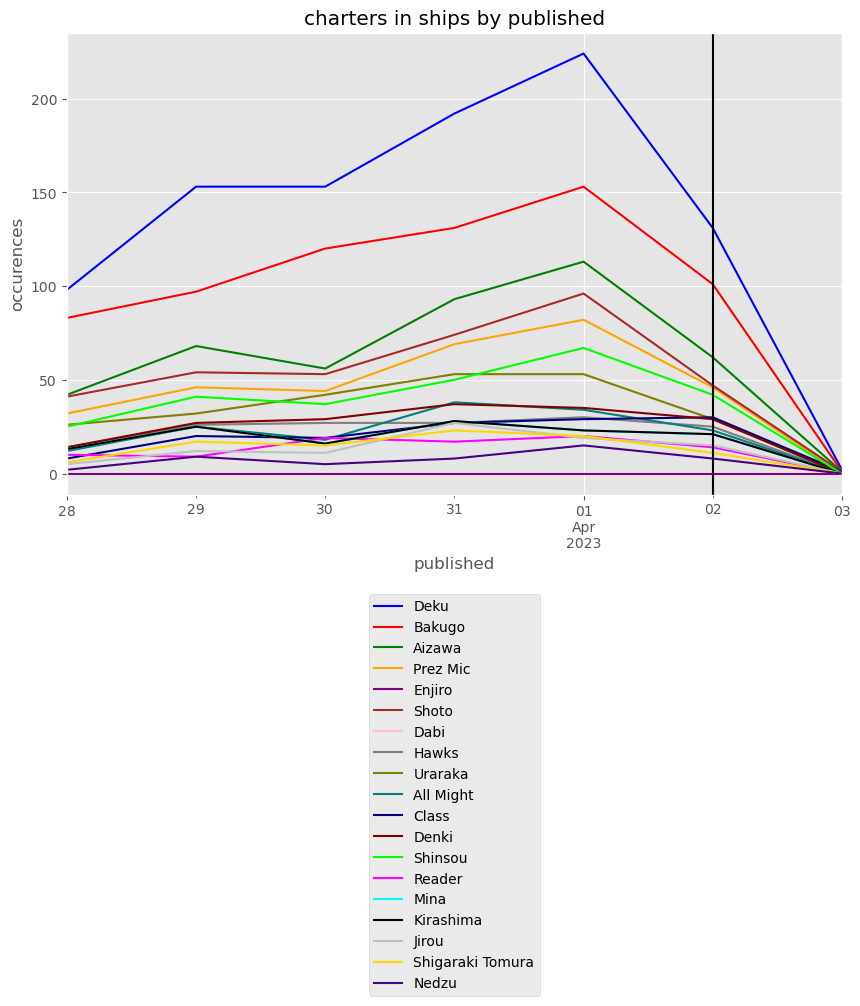

In [45]:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal',
          'navy', 'maroon', 'lime', 'fuchsia', 'aqua', 'black', 'silver', 'gold', 'indigo', 'violet']


char_in_ships.plot(color = colors)
plt.ylabel('occurences')
plt.title('charters in ships by published')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'upper center')
plt.axvline(x = season_six_anime['English_Air_Date'][19], color = 'black')
plt.show()

,No.,Title,Original_Release_Date,English_Release_Date
0,1,Izuku Midoriya: OriginMidoriya Izuku: Orijin (...,2014-11-04,2015-08-04
1,2,"Rage, You Damned NerdTakere Kusonādo (猛れクソナード)",2015-01-05,2015-11-03
2,3,All MightŌrumaito (オールマイト),2015-04-03,2016-02-02
3,4,The Boy Born With EverythingSubete wo Motte Um...,2015-06-04,2016-05-03
4,5,Shoto Todoroki: OriginTodoroki Shōto: Origin (...,2015-08-04,2016-08-02
5,6,StrugglingUgomeku (蠢く),2015-11-04,2016-11-01
6,7,Katsuki Bakugo: OriginBakugō Katsuki: Origin (...,2016-02-04,2017-02-07
7,8,Yaoyorozu RisingYaoyorozu: Raijingu (八百万：ライジング),2016-04-04,2017-05-02
8,9,My HeroBoku no Hīrō (僕のヒーロー),2016-06-03,2017-08-01
9,10,All For OneŌru Fō Wan (オール・フォー・ワン),2016-09-02,2017-11-07
